In [281]:

import numpy as np
import pandas as pd
df = pd.read_csv("/Users/henrykuerbis/Downloads/good_data_real.csv")

In [282]:
df["Date"] = pd.to_datetime(df["Date"])

In [283]:
#starting to experiment with data processing, label encoding for home and away

c = 0
for value in df["Away Team"]:
    if value == "Clark" or value == "Clark ":
        df.at[c,"Away Team"] = 1
    else:
        df.at[c,"Away Team"] = 0
    c = c + 1
df["Away Team"] = df["Away Team"].astype("int64")

c1 = 0
for value in df["Home Team"]:
    if value == "Clark" or value == "Clark ":
        df.at[c1,"Home Team"] = 1
    else:
        df.at[c1,"Home Team"] = 0
    c1 = c1 + 1
df["Home Team"] = df["Home Team"].astype("int64")

In [284]:
c2 = 0
a = ""
for value in df["Home Team"]:
    a += str(df.at[c2,"Home Team"])
    a += " "
    a += str(df.at[c2,"Away Team"])
    a += "\n"
    c2 = c2 + 1
print(a)

0 1
0 1
1 0
1 0
0 1
1 0
1 0
1 0
1 0
0 1
1 0
0 1
1 0
1 0
0 1
0 1
0 1
1 0
1 0
0 1
0 1
1 0
0 1
1 0
1 0
0 1
1 0
1 0
0 1
1 0
0 1
0 1
1 0
0 1
1 0
0 1
1 0
1 0
0 1
1 0
1 0
0 1
1 0
0 1
0 1
0 1
1 0
0 1
1 0
1 0
0 1
0 1
1 0
1 0
0 1
0 1
1 0
0 1
0 1
1 0
1 0
0 1
1 0
0 1
1 0
1 0
0 1
0 1
1 0
1 0
0 1
0 1
1 0
0 1
1 0
1 0
1 0
0 1
1 0
0 1
0 1
0 1
0 1
0 1
1 0



In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           85 non-null     datetime64[ns]
 1   Home Team      85 non-null     int64         
 2   Away Team      85 non-null     int64         
 3   H_Prev_Season  85 non-null     int64         
 4   A_Prev_Season  85 non-null     int64         
 5   FT_Home Goals  85 non-null     int64         
 6   FT_Away Goals  85 non-null     int64         
 7   H_Team Shots   85 non-null     int64         
 8   A_Team Shots   85 non-null     int64         
 9   H_Team Shot %  85 non-null     float64       
 10  A_Team Shot %  85 non-null     float64       
 11  H_Team SOG     85 non-null     int64         
 12  A_Team SOG     85 non-null     int64         
 13  H_Team SOG %   85 non-null     float64       
 14  A_Team SOG %   85 non-null     float64       
 15  HT_Corners     85 non-nul

In [286]:
df.columns

Index(['Date', 'Home Team', 'Away Team', 'H_Prev_Season', 'A_Prev_Season',
       'FT_Home Goals', 'FT_Away Goals', 'H_Team Shots', 'A_Team Shots',
       'H_Team Shot %', 'A_Team Shot %', 'H_Team SOG', 'A_Team SOG',
       'H_Team SOG %', 'A_Team SOG %', 'HT_Corners', 'AT_Corners', 'HT_Red',
       'AT_Red', 'HT_Yellow', 'AT_Yellow', 'HT_Fouls', 'AT_Fouls',
       'Result(Clark)'],
      dtype='object')

In [287]:
df.head()

,Date,Home Team,Away Team,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,...,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark)
0,2010-09-18,0,1,4,5,2,3,9,8,0.222,...,0.750,6,7,0,0,1,1,10,6,2
1,2010-09-25,0,1,7,5,1,1,15,16,0.067,...,0.000,6,2,0,0,2,1,15,12,1
2,2010-10-02,1,0,5,2,1,2,7,13,0.143,...,0.692,1,4,0,0,2,2,0,0,0
3,2010-10-09,1,0,5,6,2,2,13,15,0.154,...,0.400,6,6,0,0,2,1,0,0,1
4,2010-10-23,0,1,3,5,1,0,19,7,0.053,...,0.429,5,2,0,0,1,0,12,9,0


In [288]:

df = df.drop(columns = "Date")
y = df["Result(Clark)"]
X = df.drop(columns = ["Result(Clark)"])

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [290]:
#inital score before tuning or data processing

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', max_iter=100000)
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

0.5882352941176471

In [291]:
predictions_test=logreg.predict(X_test)
combined = pd.DataFrame(dict(actual=y_test, predicted=predictions_test))

In [292]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1,2
actual,,,
0,15,1,2
1,3,2,0
2,8,0,3


In [293]:
df2 = pd.read_csv("/Users/henrykuerbis/Downloads/Final_Project_Data_Sheet1.csv")

In [294]:
df2 = df2.drop(columns = "Date")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Home Team      85 non-null     object 
 1   Away Team      85 non-null     object 
 2   H_Prev_Season  85 non-null     int64  
 3   A_Prev_Season  85 non-null     int64  
 4   FT_Home Goals  85 non-null     int64  
 5   FT_Away Goals  85 non-null     int64  
 6   H_Team Shots   85 non-null     int64  
 7   A_Team Shots   85 non-null     int64  
 8   H_Team Shot %  85 non-null     float64
 9   A_Team Shot %  85 non-null     float64
 10  H_Team SOG     85 non-null     int64  
 11  A_Team SOG     85 non-null     int64  
 12  H_Team SOG %   85 non-null     float64
 13  A_Team SOG %   85 non-null     float64
 14  HT_Corners     85 non-null     int64  
 15  AT_Corners     85 non-null     int64  
 16  HT_Red         85 non-null     int64  
 17  AT_Red         85 non-null     int64  
 18  HT_Yellow   

In [295]:


#def encode_and_bind(original_dataframe, feature_to_encode):
#    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
#    res = pd.concat([original_dataframe, dummies], axis=1)
#    res = res.drop([feature_to_encode], axis=1)
#    return(res)

#features_to_encode = ["Home Team","Away Team"]

#for feature in features_to_encode:
#    df2 = encode_and_bind(df2, feature)

In [296]:
df2.head()

,Home Team,Away Team,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,...,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark)
0,WPI,Clark,4,5,2,3,9,8,0.222,0.375,...,0.750,6,7,0,0,1,1,10,6,2
1,Coast Guard,Clark,7,5,1,1,15,16,0.067,0.063,...,0.000,6,2,0,0,2,1,15,12,1
2,Clark,Wheaton,5,2,1,2,7,13,0.143,0.154,...,0.692,1,4,0,0,2,2,0,0,0
3,Clark,Springfield,5,6,2,2,13,15,0.154,0.133,...,0.400,6,6,0,0,2,1,0,0,1
4,MIT,Clark,3,5,1,0,19,7,0.053,0.000,...,0.429,5,2,0,0,1,0,12,9,0


In [297]:
df2["Home Team"].unique()

array(['WPI', 'Coast Guard', 'Clark', 'MIT', 'Springfield', 'Babson',
       'Wheaton', 'Emerson', 'Clark ', 'Coast Gaurd', 'Coast Guard ',
       'Babson ', 'WPI ', 'Emerson ', 'Springfield '], dtype=object)

In [298]:
#fixing typos in data

counter = 0
for value in df2["Home Team"]:
    if " " == value[-1]:
        s = value[:len(value) - 1]
        df2.at[counter,"Home Team"] = s
    counter = counter + 1       

In [299]:
df2["Home Team"].unique()


array(['WPI', 'Coast Guard', 'Clark', 'MIT', 'Springfield', 'Babson',
       'Wheaton', 'Emerson', 'Coast Gaurd'], dtype=object)

In [300]:
#experimenting with one hot encoding

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dtype=int)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

features_to_encode = ['Home Team','Away Team']

for feature in features_to_encode:
    df2 = encode_and_bind(df2, feature)
    
df2.head()

,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,...,Away Team_Coast Guard,Away Team_Coast Guard,Away Team_Emerson,Away Team_MIT,Away Team_MIT,Away Team_Springfield,Away Team_Springfield,Away Team_WPI,Away Team_Wheaton,Away Team_Wheaton
0,4,5,2,3,9,8,0.222,0.375,5,6,...,0,0,0,0,0,0,0,0,0,0
1,7,5,1,1,15,16,0.067,0.063,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2,1,2,7,13,0.143,0.154,3,9,...,0,0,0,0,0,0,0,0,1,0
3,5,6,2,2,13,15,0.154,0.133,7,6,...,0,0,0,0,0,1,0,0,0,0
4,3,5,1,0,19,7,0.053,0.000,8,3,...,0,0,0,0,0,0,0,0,0,0


In [301]:
y1 = df2["Result(Clark)"]
X1 = df2.drop(columns = ["Result(Clark)"])

In [302]:
#one hot encoding reduces accuracy score

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear', max_iter=100000)
logreg.fit(X_train1, y_train1)

from sklearn .metrics import accuracy_score

predictions_test=logreg.predict(X_test1)
accuracy_score(y_test1, predictions_test)

0.5384615384615384

In [303]:
#experimenting with different types of scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler



# min max scaling
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df2)

# standard scaling
standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df2)


df_minmax = pd.DataFrame(df_minmax, columns=df2.columns)
df_standard = pd.DataFrame(df_standard, columns=df2.columns)

df_minmax.head()


,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,...,Away Team_Coast Guard,Away Team_Coast Guard,Away Team_Emerson,Away Team_MIT,Away Team_MIT,Away Team_Springfield,Away Team_Springfield,Away Team_WPI,Away Team_Wheaton,Away Team_Wheaton
0,0.375,0.555556,0.4,0.428571,0.241379,0.161290,0.666667,0.921376,0.263158,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750,0.555556,0.2,0.142857,0.448276,0.419355,0.201201,0.154791,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500,0.222222,0.2,0.285714,0.172414,0.322581,0.429429,0.378378,0.157895,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.500,0.666667,0.4,0.285714,0.379310,0.387097,0.462462,0.326781,0.368421,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.250,0.555556,0.2,0.000000,0.586207,0.129032,0.159159,0.000000,0.421053,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [304]:
print(df_minmax['Result(Clark)'])

0     1.0
1     0.5
2     0.0
3     0.5
4     0.0
     ... 
80    0.0
81    0.0
82    0.0
83    0.0
84    0.0
Name: Result(Clark), Length: 85, dtype: float64


In [305]:
#thresholding including ties

conditions = [
    df_minmax['Result(Clark)'] == 1.0,
    df_minmax['Result(Clark)'] == 0.5,
    df_minmax['Result(Clark)'] == 0.0
]

choices = [2, 1, 0]

df_minmax['Result(Clark)'] = np.select(conditions, choices)

In [306]:
y2 = df_minmax["Result(Clark)"]
X2 = df_minmax.drop(columns = ["Result(Clark)"])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)


In [307]:
print(y2)

0     2
1     1
2     0
3     1
4     0
     ..
80    0
81    0
82    0
83    0
84    0
Name: Result(Clark), Length: 85, dtype: int64


In [308]:
print("Length of X_train2:", len(X_train2))
print("Length of X_test2:", len(X_test2))
print("Length of y_train2:", len(y_train2))
print("Length of y_test2:", len(y_test2))



Length of X_train2: 59
Length of X_test2: 26
Length of y_train2: 59
Length of y_test2: 26


In [309]:
print(y_test2)

2     0
13    0
63    0
41    0
48    0
30    1
50    2
76    0
55    2
43    2
7     1
26    2
33    0
60    0
8     0
16    0
24    0
54    0
62    2
74    1
22    0
6     0
42    2
66    2
80    0
52    2
Name: Result(Clark), dtype: int64


In [310]:
#improved accuracy after scaling and hyperparameter tuning

logreg = LogisticRegression(solver='newton-cholesky', max_iter=100000, C=.6, penalty='l2')
logreg.fit(X_train2, y_train2)

from sklearn .metrics import accuracy_score

predictions_test2=logreg.predict(X_test2)
accuracy_score(y_test2, predictions_test2)


0.6153846153846154

In [311]:
print(predictions_test2)
print(y_test2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
2     0
13    0
63    0
41    0
48    0
30    1
50    2
76    0
55    2
43    2
7     1
26    2
33    0
60    0
8     0
16    0
24    0
54    0
62    2
74    1
22    0
6     0
42    2
66    2
80    0
52    2
Name: Result(Clark), dtype: int64


In [312]:
#confusion matrix, cant predict ties bc logistic regression is for a binary classification

combined = pd.DataFrame(dict(actual=y_test2, predicted=predictions_test2))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])


predicted,0,2
actual,,
0,15,0
1,3,0
2,7,1


In [313]:
df_minmax.head()

,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,...,Away Team_Coast Guard,Away Team_Coast Guard,Away Team_Emerson,Away Team_MIT,Away Team_MIT,Away Team_Springfield,Away Team_Springfield,Away Team_WPI,Away Team_Wheaton,Away Team_Wheaton
0,0.375,0.555556,0.4,0.428571,0.241379,0.161290,0.666667,0.921376,0.263158,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750,0.555556,0.2,0.142857,0.448276,0.419355,0.201201,0.154791,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500,0.222222,0.2,0.285714,0.172414,0.322581,0.429429,0.378378,0.157895,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.500,0.666667,0.4,0.285714,0.379310,0.387097,0.462462,0.326781,0.368421,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.250,0.555556,0.2,0.000000,0.586207,0.129032,0.159159,0.000000,0.421053,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
fd = pd.read_csv("/Users/henrykuerbis/Downloads/Final_Project_Data_Sheet1.csv")

#modifies the data to be from a specific teams pov

def new_df_spec(df, team):
    
    opponent = []
    teamteam = []
    venue = []

    count = 0

    for t in df["Home Team"]:
        if t == team:
            teamteam.append(team)
            opponent.append(df.at[count,"Away Team"])
            venue.append("Home")
        elif df.at[count,"Away Team"] == team:
            opponent.append(t)
            teamteam.append(df.at[count,"Away Team"])
            venue.append("Away")
        count = count + 1
    
    b1 = df.pop("H_Prev_Season")
    b2 = df.pop("A_Prev_Season")
    new_col1 = []

    coun = 0
    for val in df["Home Team"]:
        if val == team:
            new_col1.append(b1[coun])
        elif df.at[coun,"Away Team"] == team:
            new_col1.append(b2[coun])
        coun = coun + 1
        
    b3 = df.pop("FT_Home Goals")
    b4 = df.pop("FT_Away Goals")
    new_col2 = []

    coun1 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col2.append(b3[coun1])
        elif df.at[coun1,"Away Team"] == team:
            new_col2.append(b4[coun1])
        coun1 = coun1 + 1
    
    
    b5 = df.pop("H_Team Shots")
    b6 = df.pop("A_Team Shots")
    new_col3 = []

    coun2 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col3.append(b5[coun2])
        elif df.at[coun2,"Away Team"] == team:
            new_col3.append(b6[coun2])
        coun2 = coun2 + 1
    
    b7 = df.pop("H_Team Shot %")
    b8 = df.pop("A_Team Shot %")
    new_col4 = []

    coun3 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col4.append(b7[coun3])
        elif df.at[coun3,"Away Team"] == team:
            new_col4.append(b8[coun3])
        coun3 = coun3 + 1
    
    b9 = df.pop("H_Team SOG")
    b10 = df.pop("A_Team SOG")
    new_col5 = []

    coun4 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col5.append(b9[coun4])
        elif df.at[coun4,"Away Team"] == team:
            new_col5.append(b10[coun4])
        coun4 = coun4 + 1
    
    b11 = df.pop("H_Team SOG %")
    b12 = df.pop("A_Team SOG %")
    new_col6 = []

    coun5 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col6.append(b11[coun5])
        elif df.at[coun5,"Away Team"] == team:
            new_col6.append(b12[coun5])
        coun5 = coun5 + 1
        
    b13 = df.pop("HT_Corners")
    b14 = df.pop("AT_Corners")
    new_col7 = []

    coun6 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col7.append(b13[coun6])
        elif df.at[coun6,"Away Team"] == team:
            new_col7.append(b14[coun6])
        coun6 = coun6 + 1
    
    
    b15 = df.pop("HT_Red")
    b16 = df.pop("AT_Red")
    new_col8 = []

    coun7 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col8.append(b15[coun7])
        elif df.at[coun7,"Away Team"] == team:
            new_col8.append(b16[coun7])
        coun7 = coun7 + 1
    
    
    b17 = df.pop("HT_Yellow")
    b18 = df.pop("AT_Yellow")
    new_col9 = []

    coun8 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col9.append(b17[coun8])
        elif df.at[coun8,"Away Team"] == team:
            new_col9.append(b18[coun8])
        coun8 = coun8 + 1
    
    
    b19 = df.pop("HT_Fouls")
    b20 = df.pop("AT_Fouls")
    new_col10 = []

    coun9 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col10.append(b19[coun9])
        elif df.at[coun9,"Away Team"] == team:
            new_col10.append(b20[coun9])
        coun9 = coun9 + 1
        
    
    b21 = df.pop("Result(Clark)")
    new_col11 = []
    coun10 = 0
    
    if team == "Clark":
        new_col11 = b21
    else:
        for val in df["Home Team"]: 
            if val == team:
                if b21[coun10] == 2:
                    new_col11.append(0)
                elif b21[coun10] == 1:
                    new_col11.append(1)
                elif b21[coun10] == 0:
                    new_col11.append(2)
            elif df.at[coun10,"Away Team"] == team:
                if b21[coun10] == 2:
                    new_col11.append(0)
                elif b21[coun10] == 1:
                    new_col11.append(1)
                elif b21[coun10] == 0:
                    new_col11.append(2)
            coun10 = coun10 + 1
           
    new_df = pd.DataFrame({
        "Team": teamteam[:len(teamteam)],
        "Opponent": opponent[:len(opponent)],
        "Venue": venue[:len(venue)],
        "Prev_Season": new_col1[:len(new_col1)],
        "Goals": new_col2[:len(new_col2)],
        "Shots": new_col3[:len(new_col3)],
        "Shot %": new_col4[:len(new_col4)],
        "SOG": new_col5[:len(new_col5)],
        "SOG %": new_col6[:len(new_col6)],
        "Corners": new_col7[:len(new_col7)],
        "Red": new_col8[:len(new_col8)],
        "Yellow": new_col9[:len(new_col9)],
        "Fouls": new_col10[:len(new_col10)],
        "Result": new_col11[:len(new_col11)],
    })
    
    return new_df

m = new_df_spec(fd, "Babson")
m      

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,Babson,Clark,Away,1,3,24,0.125,11,0.458,4,0,1,16,2
1,Babson,Clark,Home,1,1,21,0.048,11,0.524,9,0,1,14,2
2,Babson,Clark,Away,1,5,19,0.263,9,0.474,5,0,0,13,2
3,Babson,Clark,Away,1,1,30,0.033,13,0.433,13,0,2,12,1
4,Babson,Clark,Home,3,5,19,0.263,14,0.737,1,0,0,12,2
5,Babson,Clark,Away,2,2,14,0.143,6,0.429,0,0,2,9,2
6,Babson,Clark,Home,2,1,24,0.042,11,0.458,6,0,1,22,2
7,Babson,Clark,Home,1,1,13,0.077,8,0.615,4,0,0,18,0
8,Babson,Clark,Away,1,2,15,0.133,9,0.600,4,0,1,8,2
9,Babson,Clark,Home,7,3,21,0.143,11,0.524,7,0,0,9,2


In [315]:
#new data frame from csv that has been put through the new_df_spec method above

DATA_2023 = pd.read_csv("/Users/henrykuerbis/Downloads/please_work.csv")

DATA_2023 = new_df_spec(DATA_2023, "Clark")

#label encoding for home and away

countercounter = 0
for val in DATA_2023["Venue"]:
    if val == "Home":
        DATA_2023.at[countercounter, "Venue"] = 1
    else:
        DATA_2023.at[countercounter, "Venue"] = 0
    countercounter = countercounter + 1


DATA_2023 = DATA_2023.drop(columns = ["Team","Opponent"])



In [316]:
DATA_2023

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,0,5,3,8,0.375,6,0.750,7,0,1,6,2
1,0,5,1,16,0.063,0,0.000,2,0,1,12,1
2,1,5,1,7,0.143,3,0.429,1,0,2,0,0
3,1,5,2,13,0.154,7,0.538,6,0,2,0,1
4,0,5,0,7,0.000,3,0.429,2,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,8,0,3,0.000,2,0.667,2,0,3,11,0
88,1,8,0,8,0.000,1,0.125,5,0,0,16,0
89,1,8,1,20,0.050,8,0.400,5,0,1,13,0
90,1,8,0,9,0.000,1,0.111,2,0,0,15,1


In [317]:
#min max scaling the data

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(DATA_2023)

DATA_2023 = pd.DataFrame(df_minmax, columns=DATA_2023.columns)
DATA_2023



,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,0.0,0.625,0.75,0.250000,1.000000,0.315789,0.93750,0.500000,0.0,0.25,0.315789,1.0
1,0.0,0.625,0.25,0.583333,0.168000,0.000000,0.00000,0.142857,0.0,0.25,0.631579,0.5
2,1.0,0.625,0.25,0.208333,0.381333,0.157895,0.53625,0.071429,0.0,0.50,0.000000,0.0
3,1.0,0.625,0.50,0.458333,0.410667,0.368421,0.67250,0.428571,0.0,0.50,0.000000,0.5
4,0.0,0.625,0.00,0.208333,0.000000,0.157895,0.53625,0.142857,0.0,0.00,0.473684,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,1.000,0.00,0.041667,0.000000,0.105263,0.83375,0.142857,0.0,0.75,0.578947,0.0
88,1.0,1.000,0.00,0.250000,0.000000,0.052632,0.15625,0.357143,0.0,0.00,0.842105,0.0
89,1.0,1.000,0.25,0.750000,0.133333,0.421053,0.50000,0.357143,0.0,0.25,0.684211,0.0
90,1.0,1.000,0.00,0.291667,0.000000,0.052632,0.13875,0.142857,0.0,0.00,0.789474,0.5


In [318]:
#thresholding scalled values for results column, seperating tie and losses from wins

conditions = [
    DATA_2023["Result"] > 0.5,
    DATA_2023["Result"] <= 0.5,
]

choices = [1, 0]

DATA_2023["Result"] = np.select(conditions, choices)



In [319]:
y1 = DATA_2023["Result"]
X1 = DATA_2023.drop(columns = ["Result"])

#running logreg model with most effective hyperperamaters based on paramgrid. i removed the paragrid becuase it had a very long run time

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)
logreg1 = LogisticRegression(C= 10, max_iter= 100, penalty= 'l2', solver= 'lbfgs')
logreg1.fit(X_train1, y_train1)

#0.6158482110660260 (previous best accuracy score)

LogisticRegression(C=10)

In [320]:
#predictions and accuracy score based scaled data

predictions_test=logreg1.predict(X_test1)
print(predictions_test)
accuracy_score(y_test1, predictions_test)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]


0.8571428571428571

In [321]:
from sklearn.metrics import precision_score

precision_score(y_test1, predictions_test, average='micro')


0.8571428571428571

In [322]:
#confusion matrix of models predictions

combined = pd.DataFrame(dict(actual=y_test1, predicted=predictions_test))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,22,1
1,3,2


In [323]:
#seperating 2023 season for testing from previous seasons for training

DATA_2023_TRAIN = DATA_2023.iloc[:82]
DATA_2023_TEST = DATA_2023.iloc[85:]

In [324]:
#fitting the model to data from seasons prior to 2023
#making predictions for 2023 season
#creating data frame for results and predictions for 2023 season

logreg1.fit(DATA_2023_TRAIN.copy().drop(columns = ["Result"]),DATA_2023_TRAIN.copy()["Result"])
FINAL_PREDS = logreg1.predict(DATA_2023_TEST.copy().drop(columns = ["Result"]))
COMBINED = pd.DataFrame(dict(actual=DATA_2023_TEST["Result"], predicted=FINAL_PREDS), index=DATA_2023_TEST.index)

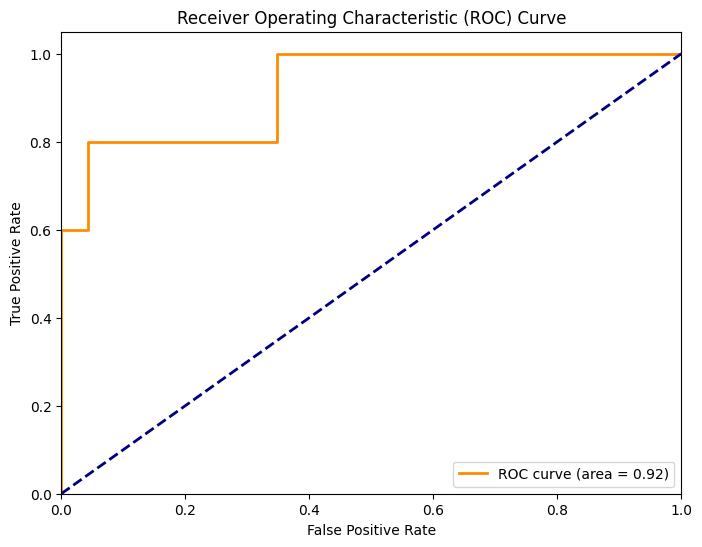

In [325]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predicting the probabilities on the test set
y_pred_probs = logreg1.predict_proba(X_test1)[:, 1]

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [326]:
#the models predictions for the 2023 season

COMBINED

,actual,predicted
85,0,0
86,0,0
87,0,0
88,0,0
89,0,0
90,0,0
91,1,1


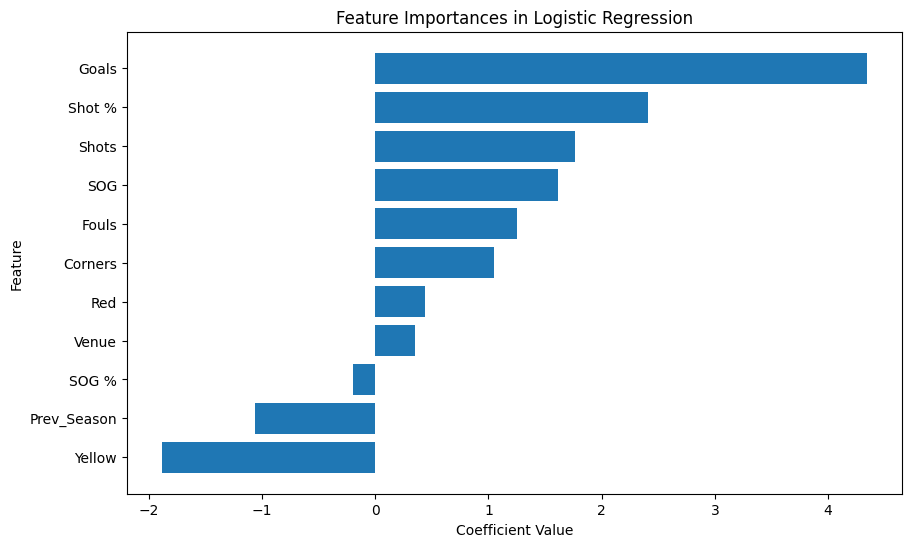

In [327]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract the coefficients and feature names
coefficients = logreg1.coef_[0]
features = X1.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sorting data frame by coefficient values
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances in Logistic Regression')
plt.gca().invert_yaxis() 
plt.show()

